<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-Lab/blob/master/Example_Training_BJBS_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gather Data:** Look for reliable datasets related to California house prices. You can find datasets on various platforms like Kaggle, UCI Machine Learning Repository, or government websites. Make sure the data is relevant, clean, and covers the necessary attributes.

In [5]:
import pandas as pd

# Assuming your file is named 'data.csv', adjust the name if necessary
df = pd.read_csv('/content/sample_data/california_housing_train.csv')


In [ ]:
df = pd.read_csv("")

Ok good, let's import the necessary libraries



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [11]:
# Display the first few rows of the dataset to get a glimpse of the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [12]:
# Get information about the columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [14]:
# Get basic summary statistics of the numerical columns
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Check for any missing values in the dataset
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [16]:
# Check for any missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


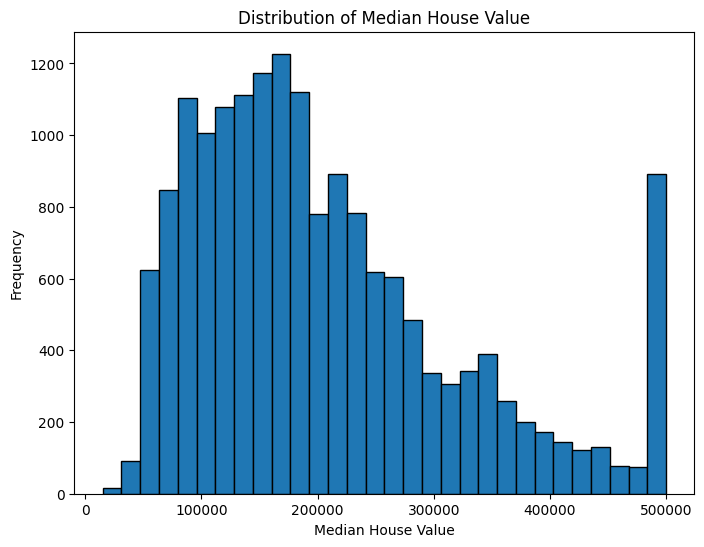

In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (median_house_value) using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'], bins=30, edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()


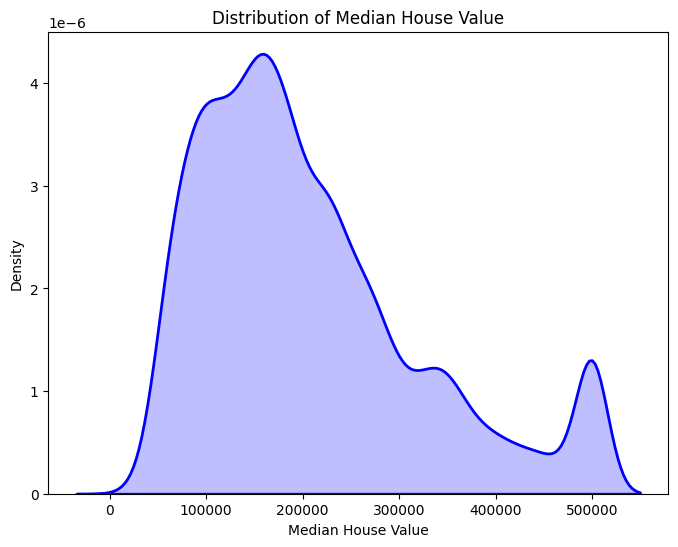

In [18]:
import seaborn as sns

# Plot the distribution of the target variable (median_house_value) using a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['median_house_value'], fill=True, color='blue', linewidth=2)
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.title('Distribution of Median House Value')
plt.show()


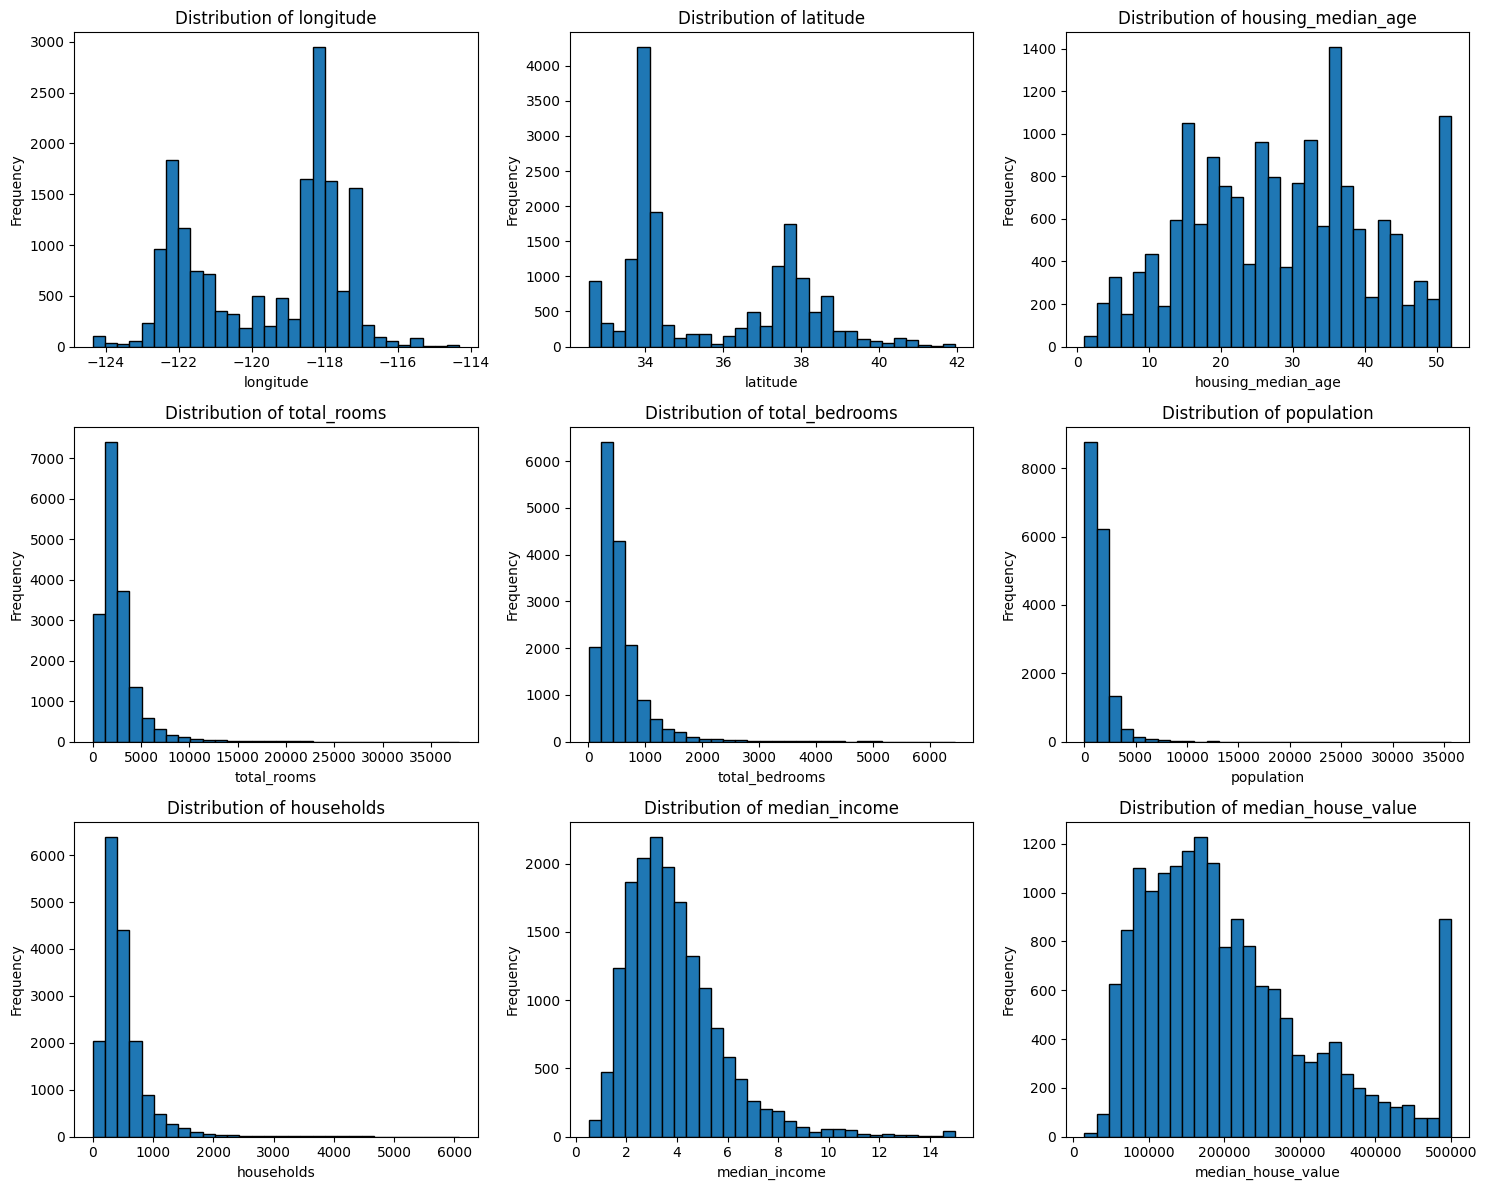

In [19]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical feature
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=30, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
import folium

# Create a map centered at the average latitude and longitude of the dataset
map_california = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Add markers for each house location
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Median House Value: ${row['median_house_value']}",
        #icon=folium.Icon(color='blue', icon='home')
    ).add_to(map_california)

# Display the map
map_california


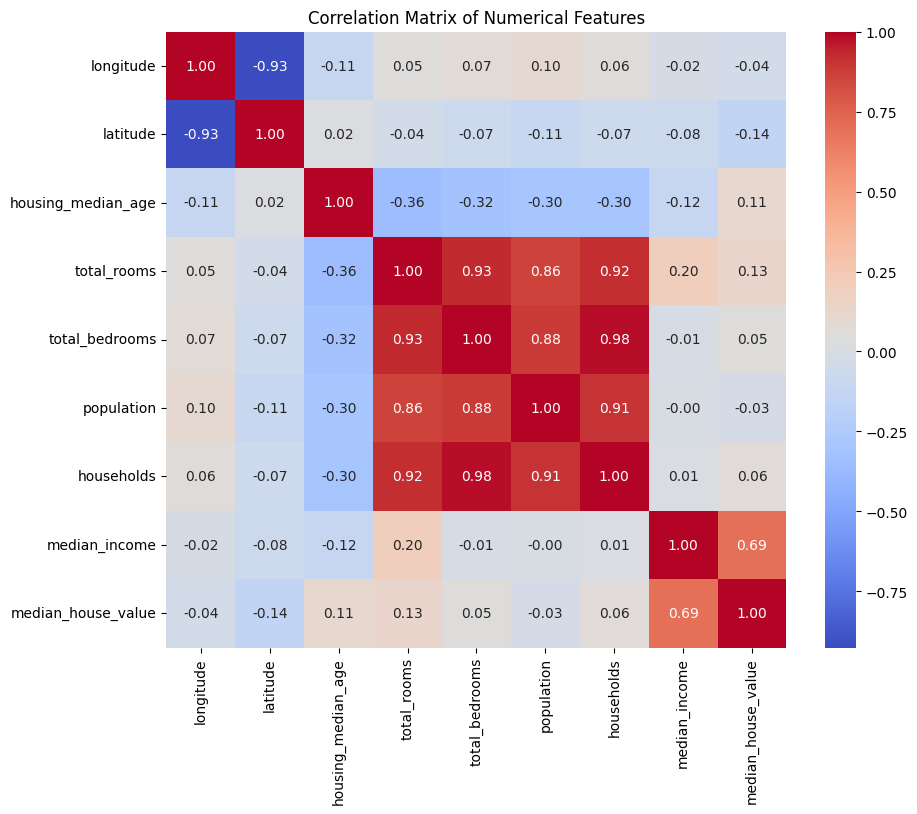

In [24]:
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


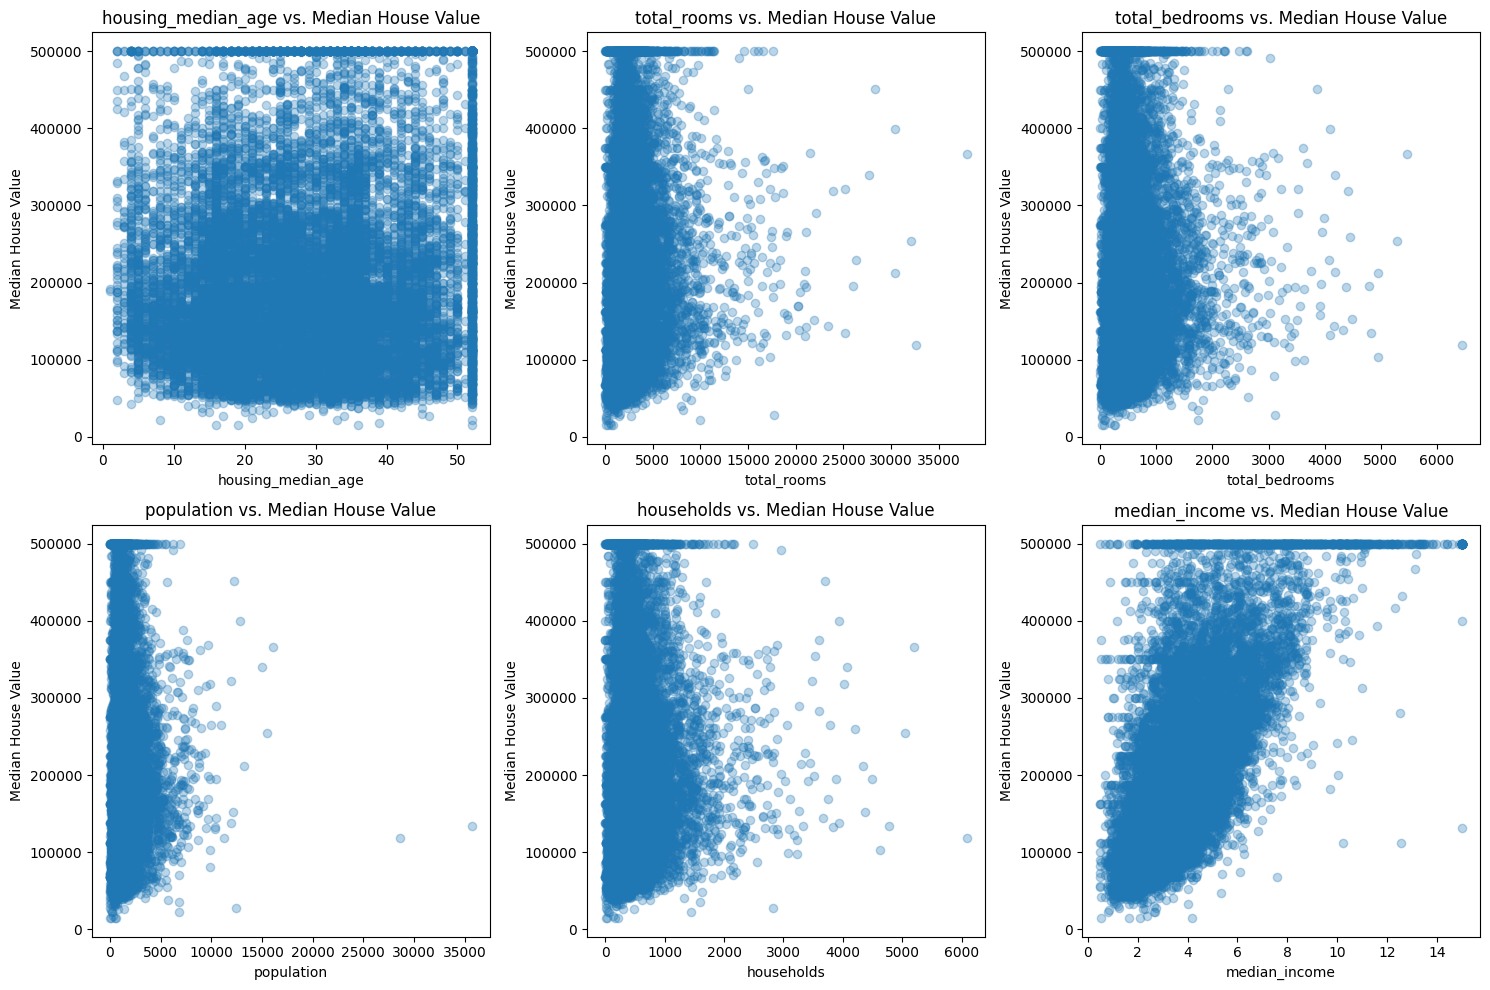

In [25]:
# Create scatter plots for the relationship between median house value and numerical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['median_house_value'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs. Median House Value')
plt.tight_layout()
plt.show()


In [28]:
# Create a new feature 'rooms_per_household'
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Create another new feature 'bedrooms_per_room'
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

# Display the updated DataFrame with the new features
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209


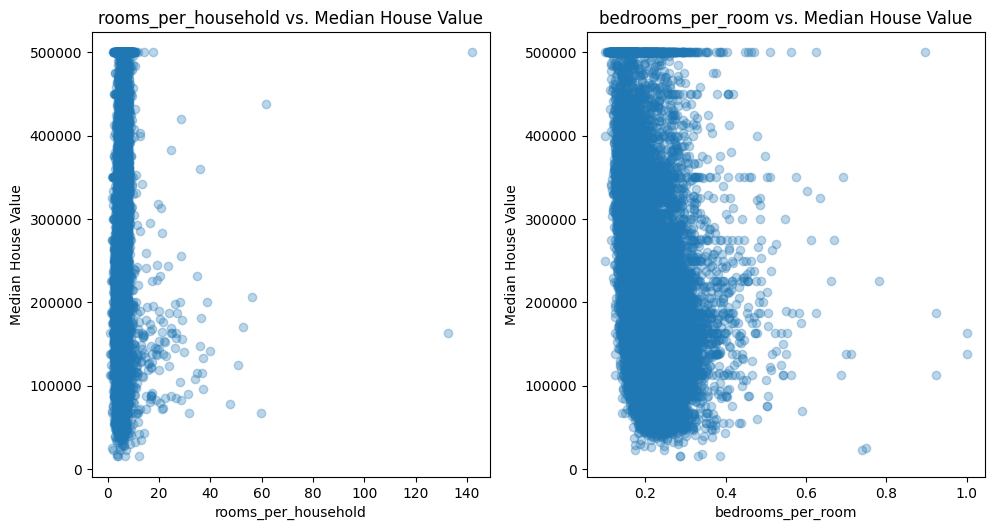

In [29]:
# Create scatter plots for the relationship between median house value and numerical features
numerical_features = ['rooms_per_household','bedrooms_per_room']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['median_house_value'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs. Median House Value')
plt.tight_layout()
plt.show()

In [31]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the outliers
outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
outliers


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
215,-116.43,33.75,24.0,2596.0,438.0,473.0,237.0,3.7727,500001.0,10.953586,0.168721
260,-116.55,33.84,28.0,2992.0,562.0,676.0,346.0,5.7613,500001.0,8.647399,0.187834
862,-117.08,34.08,34.0,45.0,11.0,39.0,14.0,3.0625,500001.0,3.214286,0.244444
1388,-117.17,32.69,40.0,2236.0,331.0,767.0,316.0,5.3177,500001.0,7.075949,0.148032
1404,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,500001.0,6.428571,0.155556
...,...,...,...,...,...,...,...,...,...,...,...
16420,-122.56,37.92,37.0,1926.0,290.0,721.0,298.0,8.9248,500001.0,6.463087,0.150571
16421,-122.56,37.91,52.0,1972.0,327.0,755.0,345.0,7.1924,500001.0,5.715942,0.165822
16434,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,500001.0,7.341826,0.135338
16482,-122.62,37.85,30.0,833.0,164.0,358.0,143.0,6.8198,493800.0,5.825175,0.196879


In [33]:
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_cleaned = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

# Display the cleaned DataFrame without outliers
df_cleaned.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,0.228617
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,0.248497
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,0.241667
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,0.224517
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,0.224209


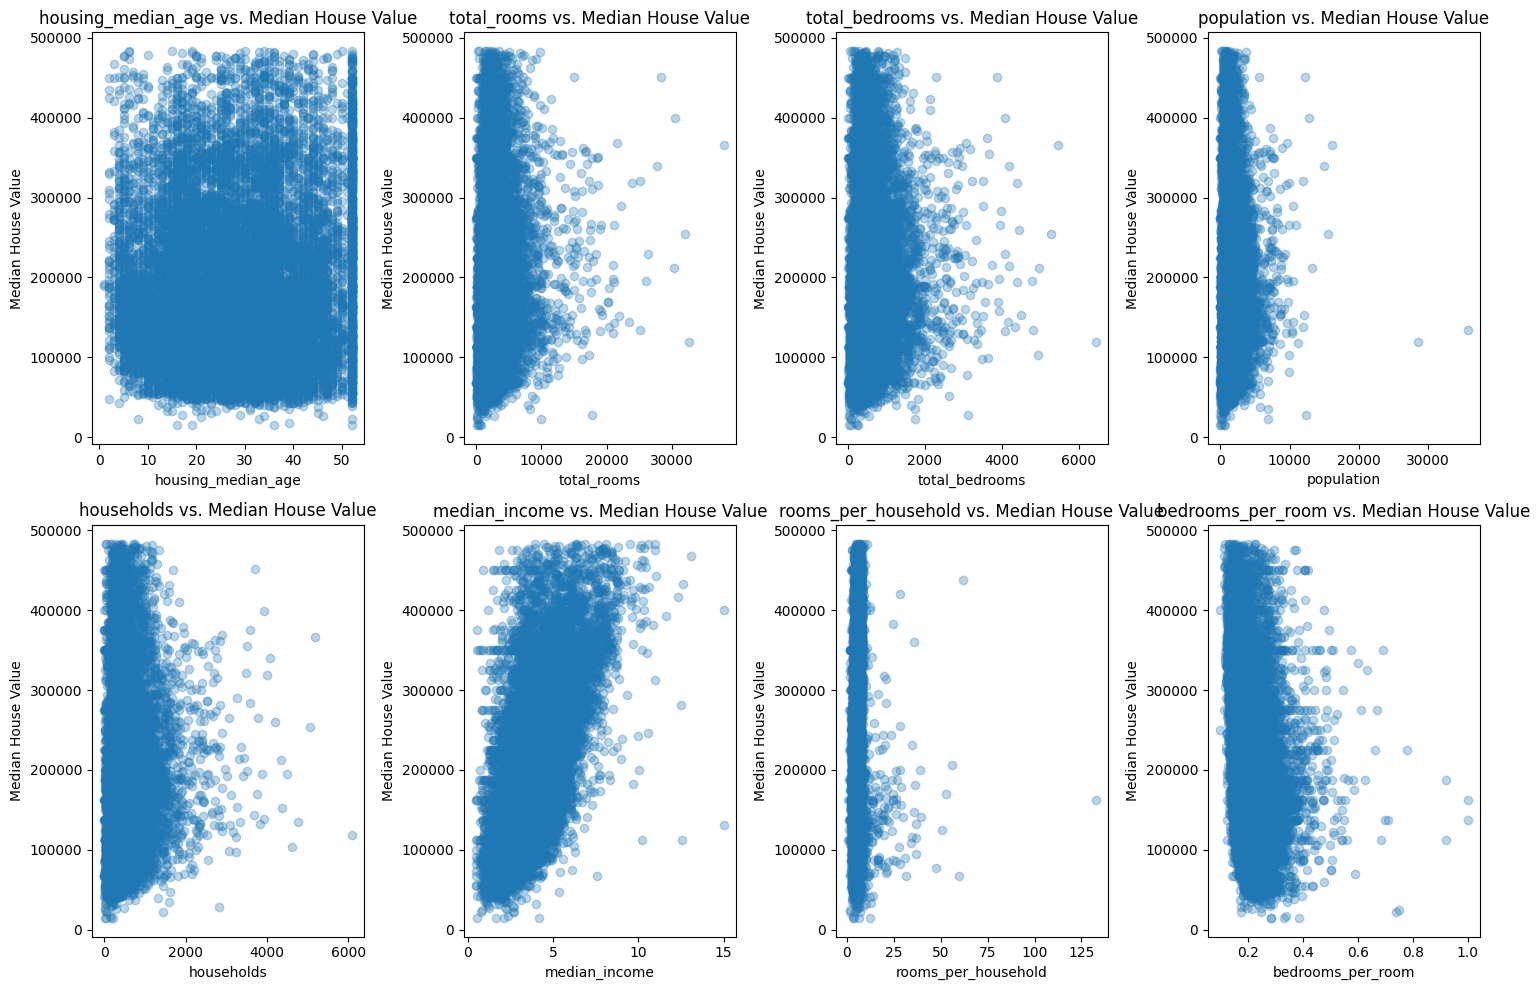

In [34]:
import matplotlib.pyplot as plt

# Create scatter plots for the relationship between median house value and numerical features in df_cleaned
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    plt.scatter(df_cleaned[feature], df_cleaned['median_house_value'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.title(f'{feature} vs. Median House Value')
plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y)
X = df_cleaned.drop('median_house_value', axis=1)
y = df_cleaned['median_house_value']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (12884, 10) (12884,)
Testing set shape: (3221, 10) (3221,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the models
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

linear_r2 = r2_score(y_test, y_pred_linear)
dt_r2 = r2_score(y_test, y_pred_dt)
rf_r2 = r2_score(y_test, y_pred_rf)

# Display the evaluation results
print("Linear Regression - RMSE:", linear_rmse, "R2:", linear_r2)
print("Decision Tree Regression - RMSE:", dt_rmse, "R2:", dt_r2)
print("Random Forest Regression - RMSE:", rf_rmse, "R2:", rf_r2)


Linear Regression - RMSE: 57328.16685699717 R2: 0.6417017380282406
Decision Tree Regression - RMSE: 64378.99583810898 R2: 0.5481471887632223
Random Forest Regression - RMSE: 43735.54226738138 R2: 0.7914656402254471
